In [5]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential
%matplotlib inline

In [3]:
data_dir = ("/content/drive/MyDrive/Emotions")

# Image Augmentation
datagen = ImageDataGenerator(rescale=1. / 255,
                             shear_range=0.25,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             width_shift_range=[-100,100],
                             height_shift_range=0.5)

generator_train = datagen.flow_from_directory( 
   data_dir, 
   target_size=(250, 250), 
   batch_size=25, 
   class_mode='binary', 
   shuffle=False)


Found 51 images belonging to 2 classes.


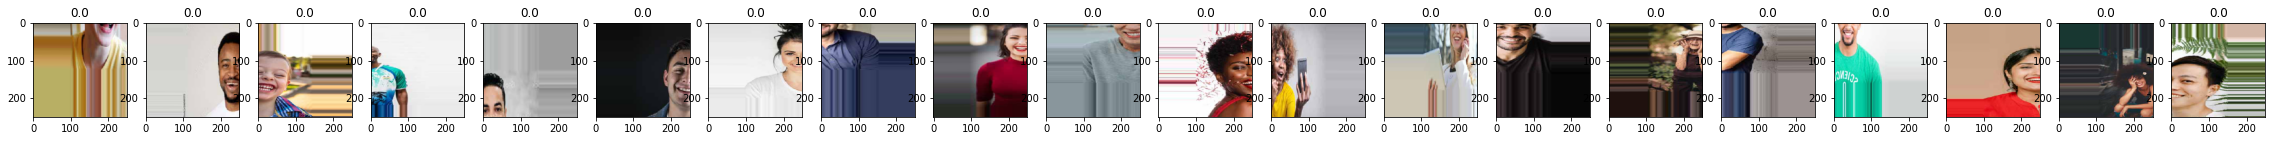

In [4]:
# ploting images
plt.figure(figsize=(40,40))
for i in range(20):
  pl = plt.subplot(1,20,i+1)
  pl.title.set_text(generator_train[0][1][i])
  plt.imshow(generator_train[0][0][i])

In [6]:
train_data,test_data,train_labels,test_labels = train_test_split(generator_train[0][0],generator_train[0][1],
                                                                 test_size=0.2,random_state=42,stratify=generator_train[0][1]
                                                                 )

In [14]:
 #Creating Model 
model = Sequential() 

model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(250,250,3),padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten()) 
 
model.add(Dense(50, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 123, 123, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 29, 29, 128)     

In [16]:
history = model.fit(train_data, train_labels, 
   epochs=5,
   batch_size=50,)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.6729 - accuracy: 0.6500
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 3.8461e-06 - accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 2.6280e-10 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 4s 4s/step - loss: 4.5032e-12 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 1.6713e-18 - accuracy: 1.0000


In [19]:
test_loss , test_accuracy = model.evaluate(test_data, test_labels)

print(" accuracy: {:.2f}%".format(test_accuracy * 100)) 
print(" Loss: {}".format(test_loss))

1/1 [==============================] - 0s 195ms/step - loss: 1.1843e-34 - accuracy: 1.0000
 accuracy: 100.00%
 Loss: 1.1842856480751218e-34
